# Flight Price Prediction

<strong>Problem Statement:</strong>
    
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket

In [1130]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # Required to display all columns

In [1131]:
#Import the Train DataSet

df=pd.read_excel(r"C:\Users\mum1user\Downloads\FlightDataset\Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [1132]:
df.shape

(10683, 11)

# Data Description
   
- Airline: The name of the airline.

- Date_of_Journey: The date of the journey

- Source: The source from which the service begins.

- Destination: The destination where the service ends.

- Route: The route taken by the flight to reach the destination.

- Dep_Time: The time when the journey starts from the source.

- Arrival_Time: Time of arrival at the destination.

- Duration: Total duration of the flight.

- Total_Stops: Total stops between the source and destination.

- Additional_Info: Additional information about the flight

- Price: The price of the ticket

In [1133]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We see that one record in Route and Total_Stops is missing.Lets find out one dataset where route and Total Stope is null

In [1134]:
missing_Route=df[df['Route'].isnull()]
missing_Route

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [1135]:
df.shape

(10683, 11)

In [1136]:
#We will drop this one record as we dont have information about Route and Total Stops
df.dropna(inplace = True)
df.shape

(10682, 11)

In [1137]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now we have no missing data, now lets check for Duplicates in our dataset

# Check Duplicates

In [1138]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
33,Jet Airways,15/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2 stops,In-flight meal not included,10919
49,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
73,Jet Airways,24/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 25 Jun,13h 30m,2 stops,No info,12819
81,Jet Airways,24/03/2019,Banglore,New Delhi,BLR → DEL,19:55,22:35,2h 40m,non-stop,No info,7229
87,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,04:25 07 Jun,18h 45m,2 stops,No info,13014
...,...,...,...,...,...,...,...,...,...,...,...
9408,Jet Airways,24/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 25 Jun,13h 50m,2 stops,No info,13376
9678,Jet Airways,15/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2 stops,No info,13376
9759,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
9891,Air India,6/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 07 Mar,26h 35m,2 stops,No info,12646


We see that 220 rows are duplicates, hence we should drop it right away

In [1139]:
df.drop_duplicates(keep=False,inplace=True)

In [1140]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


Now we have no duplicates in our dataset, so lets proceed with our data analysis further

In [1141]:
df.shape

(10267, 11)

# Data Cleaning

In [1142]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


<strong>Date_of_Journey</strong>

In [1143]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['DayOfJourney']=df['Date_of_Journey'].apply(lambda x:x.day)
df['MonthOfJourney']=df['Date_of_Journey'].apply(lambda x:x.month)
df['YearOfJourney']=df['Date_of_Journey'].apply(lambda x:x.year)
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,YearOfJourney
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019


In [1144]:
set(df['Source'])

{'Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'}

In [1145]:
set(df['Destination'])

{'Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'}

We see that two different destinations have same name,Delhi and New Delhi, Hence we will replace New Delhi with Delhi

In [1146]:
df['Destination'] = df['Destination'].str.replace('New Delhi','Delhi')

In [1147]:
set(df['Destination'])

{'Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata'}

<strong>Dep_Time</strong>
- First split into Departure Hour
- Second split into Departure Minute

In [1148]:
df['Dep_Hr'],df['Dep_Min'] = df['Dep_Time'].str.split(':',2).str
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,YearOfJourney,Dep_Hr,Dep_Min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019,05,50


<strong>Arrival_Time</strong>
- If we see few data in Arrival time has the next day as the flight arrives after 12 o clock midnight next day
- Split into Arrival Hour and Arrival minutes

In [1149]:
df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [1150]:
df['Arrival_Time'],_= df['Arrival_Time'].str.split(' ',1).str

In [1151]:
df['Arrival_Time']

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10267, dtype: object

In [1152]:
df['Arr_Hr'],df['Arr_Min'] = df['Arrival_Time'].str.split(':',2).str

In [1153]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,YearOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019,05,50,13,15


<strong>Duration</strong>
- Split the Duration in Duration Hour and Duration minutes

In [1154]:
df['Duration'] = df['Duration'].str.replace('h ',':').str.replace('m','')

In [1155]:
df['Duration_Hr'],df['Duration_Min'] = df['Duration'].str.split(':',2).str

In [1156]:
df.isnull().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info      0
Price                0
DayOfJourney         0
MonthOfJourney       0
YearOfJourney        0
Dep_Hr               0
Dep_Min              0
Arr_Hr               0
Arr_Min              0
Duration_Hr          0
Duration_Min       981
dtype: int64

We see that we have nan values in Duration Min, so we will fill it with 0 because the above result return nan only when Duration minute is equal to 0

In [1157]:
df = df.fillna(0)   
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,YearOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10,2:50,non-stop,No info,3897,24,3,2019,22,20,01,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2 stops,No info,7662,5,1,2019,05,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,6,9,2019,09,25,04,25,19h,0


In [1158]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
DayOfJourney       0
MonthOfJourney     0
YearOfJourney      0
Dep_Hr             0
Dep_Min            0
Arr_Hr             0
Arr_Min            0
Duration_Hr        0
Duration_Min       0
dtype: int64

So we have no NaN values now

<strong>Total_Stops</strong>
- We see that we have no stop,1 stop,2 stop,3 stop and 4 stops, lets deal with them now

In [1159]:
set(df['Total_Stops'])

{'1 stop', '2 stops', '3 stops', '4 stops', 'non-stop'}

In [1160]:
df['Total_Stops'],_ = df['Total_Stops'].str.split(' stops').str
df['Total_Stops'],_ = df['Total_Stops'].str.split(' stop').str

In [1161]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,YearOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10,2:50,non-stop,No info,3897,24,3,2019,22,20,01,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2,No info,7662,5,1,2019,05,50,13,15,7,25


In [1162]:
set(df['Total_Stops'])

{'1', '2', '3', '4', 'non-stop'}

In [1163]:
df['Total_Stops'] = df['Total_Stops'].apply(lambda x: 0 if 'non-stop' in x else x)

In [1164]:
set(df['Total_Stops'])

{0, '1', '2', '3', '4'}

In [1165]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,YearOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10,2:50,0,No info,3897,24,3,2019,22,20,01,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2,No info,7662,5,1,2019,05,50,13,15,7,25


<strong>Additional_Info</strong>

In [1166]:
set(df['Additional_Info'])

{'1 Long layover',
 '1 Short layover',
 '2 Long layover',
 'Business class',
 'Change airports',
 'In-flight meal not included',
 'No Info',
 'No check-in baggage included',
 'No info',
 'Red-eye flight'}

If we see the above set, No Info and No info is similar data , so lets replace No info with No Info

In [1167]:
df['Additional_Info'] = df['Additional_Info'].str.replace('No info','No Info')

In [1168]:
set(df['Additional_Info'])

{'1 Long layover',
 '1 Short layover',
 '2 Long layover',
 'Business class',
 'Change airports',
 'In-flight meal not included',
 'No Info',
 'No check-in baggage included',
 'Red-eye flight'}

In [1169]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,YearOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10,2:50,0,No Info,3897,24,3,2019,22,20,01,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2,No Info,7662,5,1,2019,05,50,13,15,7,25


In [1170]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,YearOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10,2:50,0,No Info,3897,24,3,2019,22,20,01,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2,No Info,7662,5,1,2019,05,50,13,15,7,25


Since we have converted the below columns into different columns, hence we should delete them. Also if we see Route and Total_Stops are related to each other, we should delete Route too and we have data only for the year 2019, hence we will delete YearOfJourney column too
- Date_of_Journey
- Dep_Time
- Duration
- Arrival_Time
- Route
- YearOfJourney

Lets drop the above 4 columns

In [1171]:
df.drop(["Date_of_Journey", "Dep_Time","Duration","Arrival_Time","Route","YearOfJourney"], axis = 1, inplace = True)

In [1172]:
df.shape

(10267, 14)

In [1173]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,IndiGo,Banglore,Delhi,0,No Info,3897,24,3,22,20,01,10,2,50
1,Air India,Kolkata,Banglore,2,No Info,7662,5,1,05,50,13,15,7,25


In [1174]:
set(df['Airline'])

{'Air Asia',
 'Air India',
 'GoAir',
 'IndiGo',
 'Jet Airways',
 'Jet Airways Business',
 'Multiple carriers',
 'Multiple carriers Premium economy',
 'SpiceJet',
 'Trujet',
 'Vistara',
 'Vistara Premium economy'}

# Data Analysis

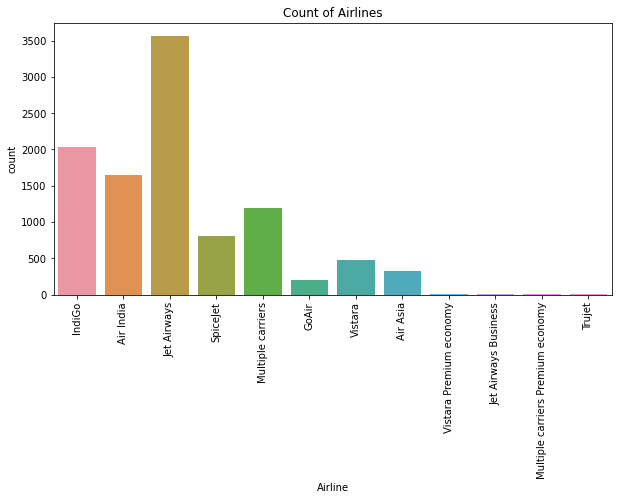

In [1175]:
plt.figure(figsize=(10,5))
sns.countplot(df['Airline'])
plt.title('Count of Airlines')
plt.xticks(rotation=90) #For names of Airlines
plt.show()

In [1176]:
df['Airline'].value_counts()

Jet Airways                          3569
IndiGo                               2033
Air India                            1644
Multiple carriers                    1196
SpiceJet                              812
Vistara                               477
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

We see that maximum Airlines belongs to JetAirways, so lets analyse which Airline has more prices

<AxesSubplot:xlabel='Price', ylabel='Airline'>

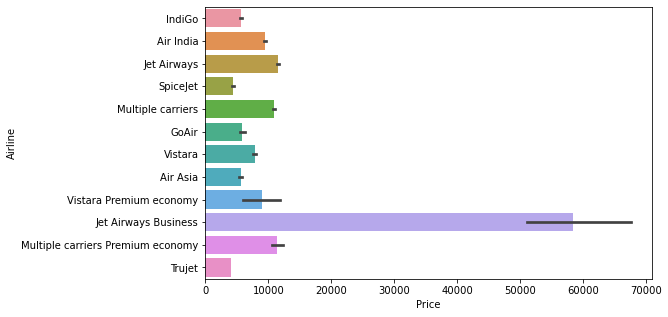

In [1177]:
plt.figure(figsize=(8,5))
sns.barplot(y="Airline",x="Price",data=df)

So we see that Jet Airways is chargins us more than other flights and this is the most available flight

Count of Source
Total number of Source :  5
Source Counts :
 Delhi       4178
Kolkata     2850
Banglore    2161
Mumbai       697
Chennai      381
Name: Source, dtype: int64


<AxesSubplot:xlabel='Source', ylabel='count'>

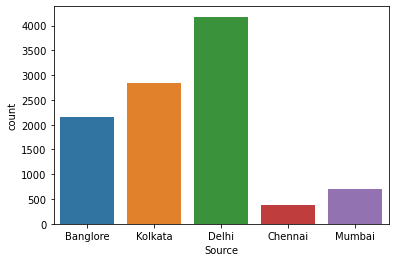

In [1178]:
print('Count of Source')
print("Total number of Source : ",df['Source'].nunique())
source_counts = df['Source'].value_counts()
source_counts
print('Source Counts :'"\n",source_counts)
sns.countplot(df['Source'])

In [1179]:
import plotly.offline as py
import plotly.graph_objs as go
source=[source_counts['Banglore'],
       source_counts['Kolkata'],
       source_counts['Delhi'],
       source_counts['Chennai'],
       source_counts['Mumbai'],
        
      ]
data_label=['Banglore', 'Kolkata','Delhi', 'Chennai', 'Mumbai']

source_pieChart=go.Pie(labels=data_label,values=source)
py.iplot([source_pieChart])

Maximum flight departs from Delhi (40.7%),followed by Kolkata,Banglore,Mumbai and Chennai

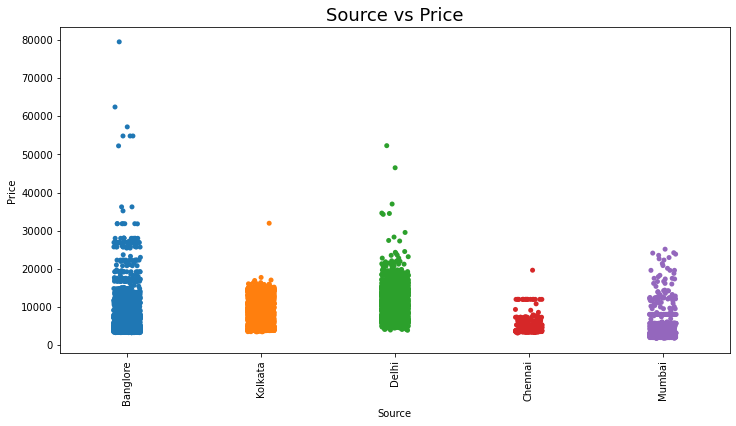

In [1180]:
plt.figure(figsize=(12,6))
sns.stripplot(df['Source'], df['Price'])
plt.title('Source vs Price', size=18)
plt.xticks(rotation=90)
plt.show()

In the range till 20000, we see that maximumn prices are from the Source Delhi 

Count of Destination
Total number of Destination :  5
Destination Counts :
 Cochin       4178
Banglore     2850
Delhi        2161
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


<AxesSubplot:xlabel='Destination', ylabel='count'>

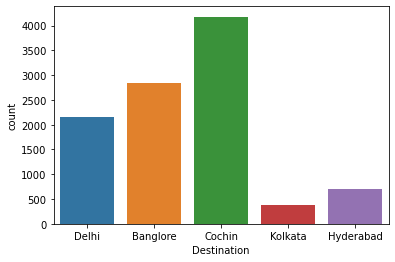

In [1181]:
print('Count of Destination')
print("Total number of Destination : ",df['Destination'].nunique())
dest_counts = df['Destination'].value_counts()
dest_counts
print('Destination Counts :'"\n",dest_counts)
sns.countplot(df['Destination'])

In [1182]:
import plotly.offline as py
import plotly.graph_objs as go
dest=[dest_counts['Delhi'],
       dest_counts['Banglore'],
       dest_counts['Cochin'],
       dest_counts['Kolkata'],
       dest_counts['Hyderabad'],
        
      ]
data_label=['Delhi', 'Banglore','Cochin', 'Kolkata', 'Hyderabad']

dest_pieChart=go.Pie(labels=data_label,values=dest)
py.iplot([dest_pieChart])

The destination of maximum Airlines is Cochin(40.7%), Now lets compare Price with destination

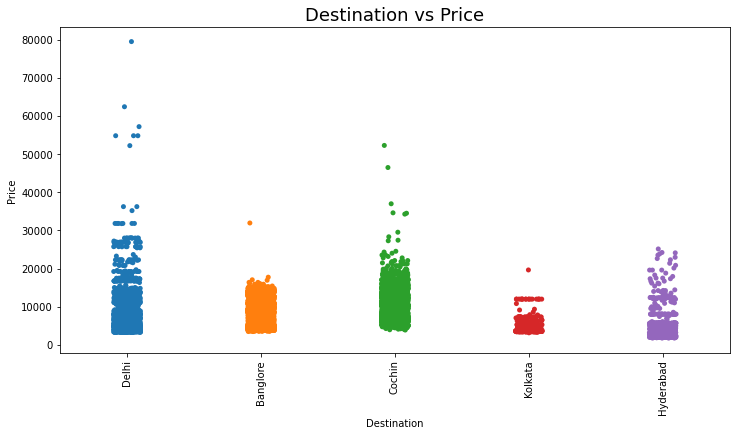

In [1183]:
plt.figure(figsize=(12,6))
sns.stripplot(df['Destination'], df['Price'])
plt.title('Destination vs Price', size=18)
plt.xticks(rotation=90)
plt.show()

The price where destination Cochin is more when compared to prices of other states

Count of Total Stops
Total number of stops :  5
Stop Counts :
 1    5625
0    3459
2    1141
3      41
4       1
Name: Total_Stops, dtype: int64


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

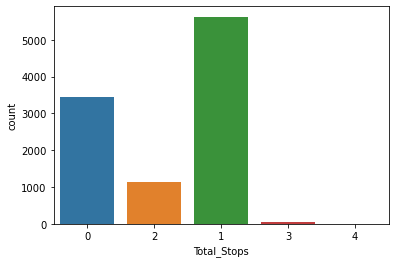

In [1184]:
print('Count of Total Stops')
print("="*30)
print("Total number of stops : ",df['Total_Stops'].nunique())
print("="*30)
stop_counts = df['Total_Stops'].value_counts()
print('Stop Counts :'"\n",stop_counts)
print("="*30)
sns.countplot(df['Total_Stops'])

<AxesSubplot:xlabel='Price', ylabel='Total_Stops'>

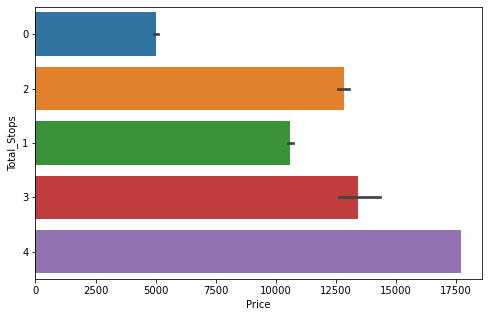

In [1185]:
plt.figure(figsize=(8,5))
sns.barplot(y="Total_Stops",x="Price",data=df)

We see that if number of stops increase the price of the Airline increases,We have only one records of 4 stops and we see that it has the maximum price.

Count of Additional Info
Total number of Additional_Info :  9
Additional_Info Counts :
 No Info                         8042
In-flight meal not included     1876
No check-in baggage included     316
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64


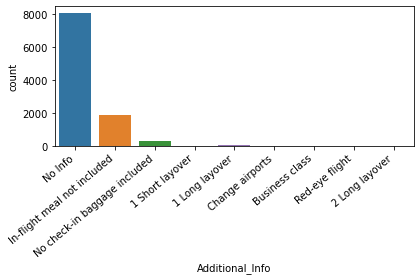

In [1186]:
print('Count of Additional Info')
print("="*30)
print("Total number of Additional_Info : ",df['Additional_Info'].nunique())
print("="*30)
stop_counts = df['Additional_Info'].value_counts()
print('Additional_Info Counts :'"\n",stop_counts)
print("="*30)
ax = sns.countplot(x="Additional_Info", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Additional_Info'>

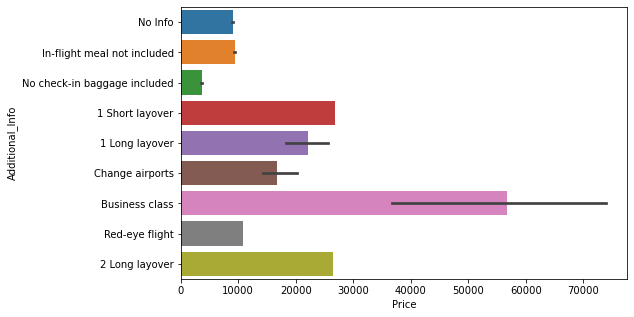

In [1187]:
plt.figure(figsize=(8,5))
sns.barplot(y="Additional_Info",x="Price",data=df)

Person travelling in Business class has to pay more than other classes

<strong>DayOfJourney</strong>

Count of DayOfJourney
Total number of DayOfJourney :  9
DayOfJourney Counts :
 6     2064
5     1355
3     1328
21    1063
27    1057
24     996
15     952
18     799
4      653
Name: DayOfJourney, dtype: int64


<AxesSubplot:xlabel='DayOfJourney', ylabel='count'>

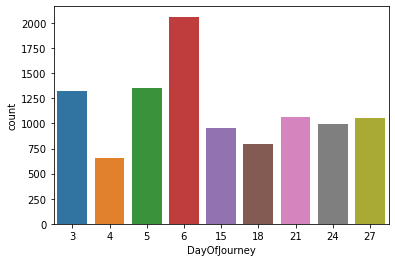

In [1188]:
print('Count of DayOfJourney')
print("="*30)
print("Total number of DayOfJourney : ",df['DayOfJourney'].nunique())
print("="*30)
stop_counts = df['DayOfJourney'].value_counts()
print('DayOfJourney Counts :'"\n",stop_counts)
print("="*30)
sns.countplot(x="DayOfJourney", data=df)

Count of MonthOfJourney
Total number of MonthOfJourney :  7
MonthOfJourney Counts :
 6     2403
3     2129
5     1984
9     1349
1     1043
12     935
4      424
Name: MonthOfJourney, dtype: int64


<AxesSubplot:xlabel='MonthOfJourney', ylabel='count'>

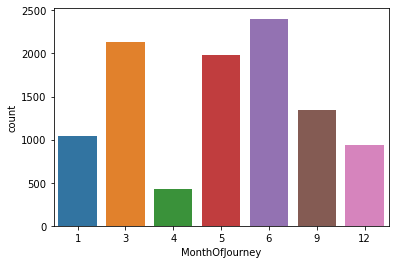

In [1189]:
print('Count of MonthOfJourney')
print("="*30)
print("Total number of MonthOfJourney : ",df['MonthOfJourney'].nunique())
print("="*30)
stop_counts = df['MonthOfJourney'].value_counts()
print('MonthOfJourney Counts :'"\n",stop_counts)
print("="*30)
sns.countplot(x="MonthOfJourney", data=df)

In [1190]:
df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,IndiGo,Banglore,Delhi,0,No Info,3897,24,3,22,20,01,10,2,50


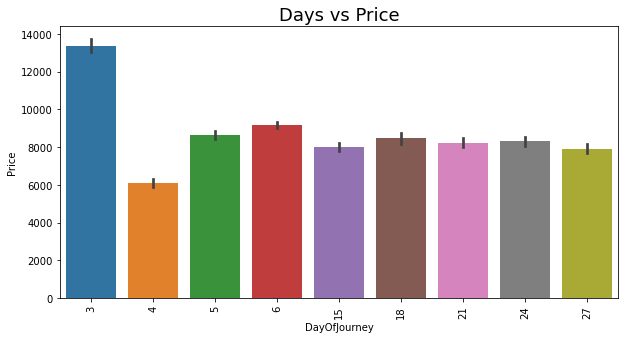

In [1192]:
plt.figure(figsize=(10,5))
sns.barplot(df['DayOfJourney'], df['Price'])
plt.title('Days vs Price', size=18)
plt.xticks(rotation=90)
plt.show()

In [1193]:
df['MonthOfJourney'] = df['MonthOfJourney'].map({
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'
})

In [1194]:
df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,IndiGo,Banglore,Delhi,0,No Info,3897,24,March,22,20,01,10,2,50


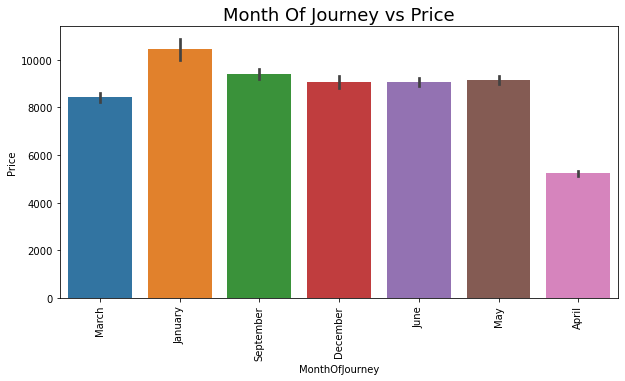

In [1195]:
plt.figure(figsize=(10,5))
sns.barplot(df['MonthOfJourney'], df['Price'])
plt.title('Month Of Journey vs Price', size=18)
plt.xticks(rotation=90)
plt.show()

In [1196]:
set(df['Dep_Hr'])

{'00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23'}

We see that flight departs almost every hour, so lets convert them into below but before that convert them into int type as it is Object Data type.

- Morning
- Afternoon
- Evening
- Night
- Late Night


In [1198]:
df["Dep_Hr"] = df["Dep_Hr"].astype(str).astype(int)

In [1199]:
set(df["Dep_Hr"])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23}

In [1200]:
df["TimeOfDay"]=np.where((df["Dep_Hr"]>=0)&(df["Dep_Hr"]<=3),"Late Night",
                         np.where((df["Dep_Hr"]>3)&(df["Dep_Hr"]<=8),"Early Morning",
                         np.where((df["Dep_Hr"]>8)&(df["Dep_Hr"]<=11),"Morning",
                         np.where((df["Dep_Hr"]>11)&(df["Dep_Hr"]<=15),"Afternoon",
                         np.where((df["Dep_Hr"]>15)&(df["Dep_Hr"]<=20),"Evening","Night")))))

In [1201]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,TimeOfDay
0,IndiGo,Banglore,Delhi,0,No Info,3897,24,March,22,20,01,10,2,50,Night
1,Air India,Kolkata,Banglore,2,No Info,7662,5,January,5,50,13,15,7,25,Early Morning


Count of TimeOfDay
Total number of TimeOfDay :  6
TimeOfDay Counts :
 Early Morning    2925
Evening          2744
Morning          1954
Afternoon        1389
Night             960
Late Night        295
Name: TimeOfDay, dtype: int64


<AxesSubplot:xlabel='TimeOfDay', ylabel='count'>

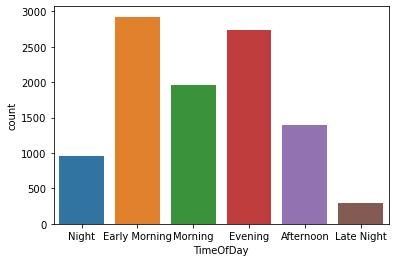

In [1202]:
print('Count of TimeOfDay')
print("="*30)
print("Total number of TimeOfDay : ",df['TimeOfDay'].nunique())
print("="*30)
dep_counts = df['TimeOfDay'].value_counts()
print('TimeOfDay Counts :'"\n",dep_counts)
print("="*30)
sns.countplot(x="TimeOfDay", data=df)

We see that we have maximum flights in the early morning and least flights are available in the late night

<AxesSubplot:xlabel='Price', ylabel='TimeOfDay'>

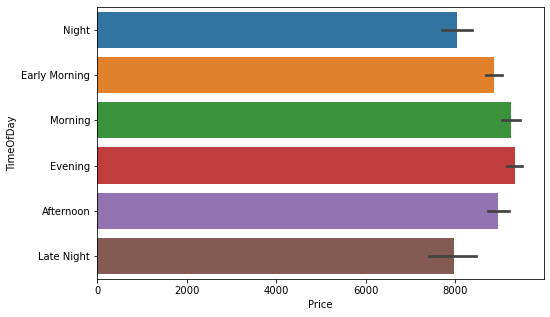

In [1203]:
plt.figure(figsize=(8,5))
sns.barplot(y="TimeOfDay",x="Price",data=df)

- From the graph we notice that we have a very close difference in the prices of flights operating in the Evening and Morning.However Evening flight have a bit higher prices than Morning,early morning,afternoon flight,night flights.

- Flight at Late night are cheaper

- Nw since we are done with our analysis, we will drop TimeOfDay column as it is no longer required.

In [1204]:
df.drop('TimeOfDay',axis=1,inplace=True)

<strong>Arr_Hr</strong>

We see that flight arrives almost every hour, so lets convert them into below but before that convert them into int type as it is Object Data type.

- Morning
- Afternoon
- Evening
- Night
- Late Night

In [1205]:
df["Arr_Hr"] = df["Arr_Hr"].astype(str).astype(int)

In [1206]:
set(df["Arr_Hr"])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23}

In [1207]:
df["ArrivalTimeOfDay"]=np.where((df["Arr_Hr"]>=0)&(df["Arr_Hr"]<=3),"Late Night",
                         np.where((df["Arr_Hr"]>3)&(df["Arr_Hr"]<=8),"Early Morning",
                         np.where((df["Arr_Hr"]>8)&(df["Arr_Hr"]<=11),"Morning",
                         np.where((df["Arr_Hr"]>11)&(df["Arr_Hr"]<=15),"Afternoon",
                         np.where((df["Arr_Hr"]>15)&(df["Arr_Hr"]<=20),"Evening","Night")))))

Count of ArrivalTimeOfDay
Total number of ArrivalTimeOfDay :  6
ArrivalTimeOfDay Counts :
 Evening          2936
Night            1821
Early Morning    1685
Afternoon        1599
Morning          1257
Late Night        969
Name: ArrivalTimeOfDay, dtype: int64


<AxesSubplot:xlabel='ArrivalTimeOfDay', ylabel='count'>

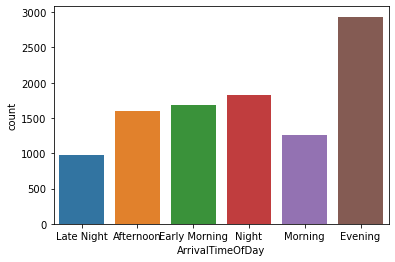

In [1208]:
print('Count of ArrivalTimeOfDay')
print("="*30)
print("Total number of ArrivalTimeOfDay : ",df['ArrivalTimeOfDay'].nunique())
print("="*30)
arr_counts = df['ArrivalTimeOfDay'].value_counts()
print('ArrivalTimeOfDay Counts :'"\n",arr_counts)
print("="*30)
sns.countplot(x="ArrivalTimeOfDay", data=df)

Here we see that most of the flights arrive in the Evening time

<AxesSubplot:xlabel='Price', ylabel='ArrivalTimeOfDay'>

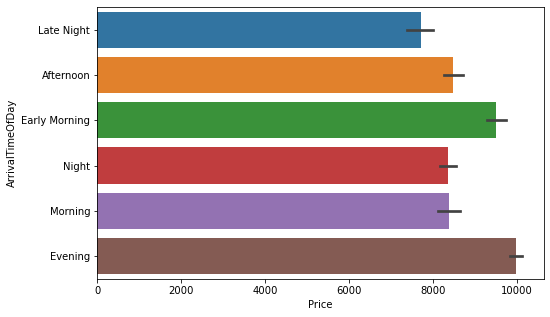

In [1209]:
plt.figure(figsize=(8,5))
sns.barplot(y="ArrivalTimeOfDay",x="Price",data=df)

- The flight which arrives at the evening has more prices than others.
- Flight which arrives at Late night are cheaper
- Nw since we are done with our analysis, we will drop ArrivalTimeOfDay column as it is no longer required.

In [1210]:
df.drop('ArrivalTimeOfDay',axis=1,inplace=True)

<strong>Duration</strong>

In [1211]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'DayOfJourney', 'MonthOfJourney', 'Dep_Hr', 'Dep_Min',
       'Arr_Hr', 'Arr_Min', 'Duration_Hr', 'Duration_Min'],
      dtype='object')

In [1212]:
set(df['Duration_Hr'])

{'1',
 '10',
 '10h',
 '11',
 '11h',
 '12',
 '12h',
 '13',
 '13h',
 '14',
 '14h',
 '15',
 '15h',
 '16',
 '16h',
 '17',
 '18',
 '18h',
 '19',
 '19h',
 '2',
 '20',
 '20h',
 '21',
 '21h',
 '22',
 '22h',
 '23',
 '23h',
 '24',
 '24h',
 '25',
 '25h',
 '26',
 '26h',
 '27',
 '27h',
 '28',
 '28h',
 '29',
 '3',
 '30',
 '30h',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '38h',
 '3h',
 '4',
 '40',
 '41',
 '42',
 '47',
 '47h',
 '4h',
 '5',
 '5h',
 '6',
 '6h',
 '7',
 '7h',
 '8',
 '8h',
 '9',
 '9h'}

We see that Duration_Hr still has h, so we will handle them now itself

In [1213]:
df['Duration_Hr'],_ = df['Duration_Hr'].str.split('h',1).str

In [1214]:
df['Duration_Hr'] = df['Duration_Hr'].astype(int)

In [1215]:
set(df['Duration_Hr'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 40,
 41,
 42,
 47}

So we have handled the Duration Hour but total duration is Duration Hour + Duration Minutes. So we will check the data for Duration minutes first and then we will add them

In [1216]:
set(df['Duration_Min'])

{0, '10', '15', '20', '25', '30', '35', '40', '45', '5', '50', '55'}

In [1217]:
#Convert into int
df['Duration_Min'] = df['Duration_Min'].astype(int)

In [1218]:
set(df['Duration_Min'])

{0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55}

In [1219]:
df['Actual_Duration_In_Hours'] = df['Duration_Hr']+(df['Duration_Min']/60)

In [1220]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,Actual_Duration_In_Hours
0,IndiGo,Banglore,Delhi,0,No Info,3897,24,March,22,20,1,10,2,50,2.833333
1,Air India,Kolkata,Banglore,2,No Info,7662,5,January,5,50,13,15,7,25,7.416667


<AxesSubplot:xlabel='Actual_Duration_In_Hours', ylabel='Count'>

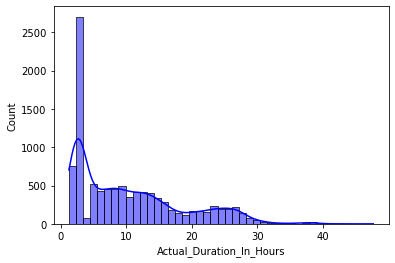

In [1221]:
sns.histplot(df['Actual_Duration_In_Hours'],color="blue",kde=True,stat="count")

We see that maximum duration is betwwen 3 to 4 hours, so lets plot Actual Duration vs Price now

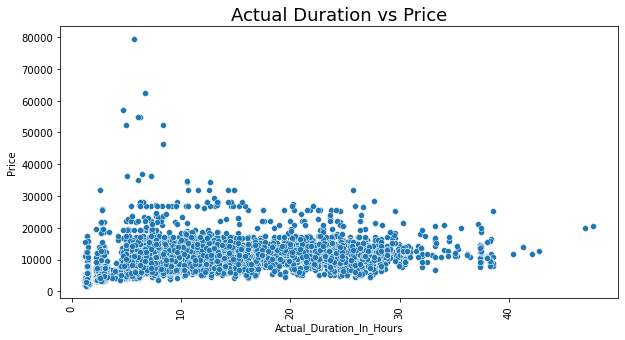

In [1222]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['Actual_Duration_In_Hours'], df['Price'])
plt.title('Actual Duration vs Price', size=18)
plt.xticks(rotation=90)
plt.show()

We dont see any clear picture for correlation between Actual Duration and Price from the graph. Now since we are done with the plotting of the graph, we will keep Actual_Duration_In_Hours and will drop Duration_Hr, Duration_Min

In [1224]:
df.drop(["Duration_Hr", "Duration_Min"], axis = 1, inplace = True)

In [1225]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Actual_Duration_In_Hours
0,IndiGo,Banglore,Delhi,0,No Info,3897,24,March,22,20,1,10,2.833333
1,Air India,Kolkata,Banglore,2,No Info,7662,5,January,5,50,13,15,7.416667


In [1226]:
df.shape

(10267, 13)

In [1227]:
df["Total_Stops"] = df["Total_Stops"].astype(str).astype(int)
df["Dep_Min"] = df["Dep_Min"].astype(str).astype(int)
df["Arr_Min"] = df["Arr_Min"].astype(str).astype(int)

In [1228]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Airline']=le.fit_transform(df['Airline'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df['Additional_Info']=le.fit_transform(df['Additional_Info'])
df['MonthOfJourney']=le.fit_transform(df['MonthOfJourney'])


In [1229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10267 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Airline                   10267 non-null  int32  
 1   Source                    10267 non-null  int32  
 2   Destination               10267 non-null  int32  
 3   Total_Stops               10267 non-null  int32  
 4   Additional_Info           10267 non-null  int32  
 5   Price                     10267 non-null  int64  
 6   DayOfJourney              10267 non-null  int64  
 7   MonthOfJourney            10267 non-null  int32  
 8   Dep_Hr                    10267 non-null  int32  
 9   Dep_Min                   10267 non-null  int32  
 10  Arr_Hr                    10267 non-null  int32  
 11  Arr_Min                   10267 non-null  int32  
 12  Actual_Duration_In_Hours  10267 non-null  float64
dtypes: float64(1), int32(10), int64(2)
memory usage: 979.9 KB


In [1230]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'DayOfJourney', 'MonthOfJourney', 'Dep_Hr', 'Dep_Min',
       'Arr_Hr', 'Arr_Min', 'Actual_Duration_In_Hours'],
      dtype='object')

# Rearranging the columns

In [1231]:
df = df[['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
        'DayOfJourney', 'MonthOfJourney', 'Dep_Hr', 'Dep_Min',
        'Arr_Hr', 'Arr_Min', 'Actual_Duration_In_Hours','Price']]
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,DayOfJourney,MonthOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Actual_Duration_In_Hours,Price
0,3,0,2,0,6,24,4,22,20,1,10,2.833333,3897
1,1,3,0,2,6,5,2,5,50,13,15,7.416667,7662


# HeatMap

<AxesSubplot:>

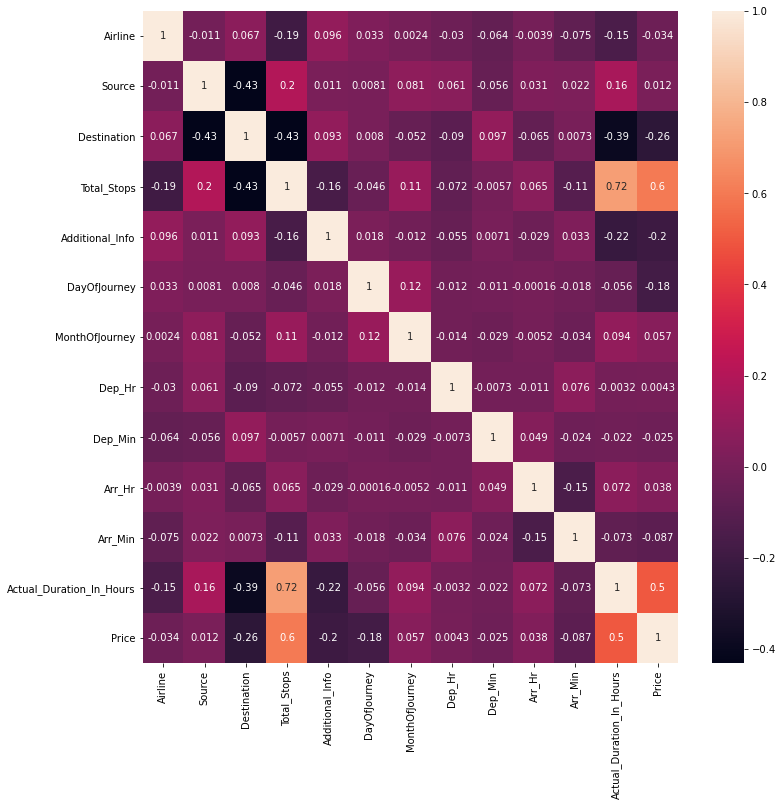

In [1232]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

- Total Stops and Actual Duration in Hours are correlated
- Total Stops and Price are correlated

# Outlier Checking

In [1233]:
dataToPlot=df.drop(columns= ['Price'])
dataToPlot.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,DayOfJourney,MonthOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Actual_Duration_In_Hours
0,3,0,2,0,6,24,4,22,20,1,10,2.833333
1,1,3,0,2,6,5,2,5,50,13,15,7.416667


In [1234]:
targetToPlot=df.loc[:, df.columns == 'Price']
targetToPlot.head(2)

,Price
0,3897
1,7662


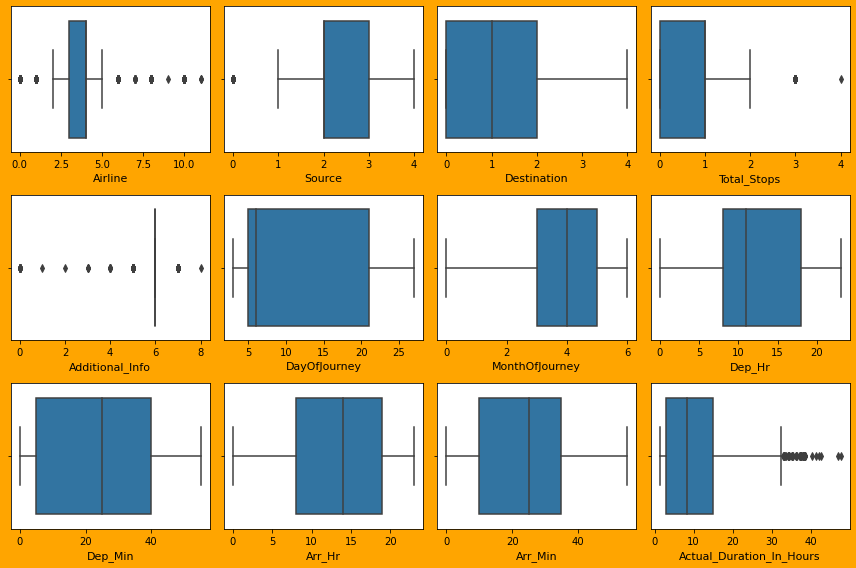

In [1235]:
#Lets see data distribution now using Boxplot
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=12:
        ax=plt.subplot(3,4,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

We see few Outliers in Actual_DUration_In_Hours column and very minimum outliers in Total Stops. So lets use zscore method to deal with the outliers

In [1236]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(10267, 13)
(10065, 13)


In [1237]:
loss_Percentage=((10267-10065)/10267)*100
loss_Percentage

1.9674685886821857

This loss is within the acceptable limits. We can easily delete the 1.968% of data and proceed further

In [1238]:
df_new.shape , df.shape

((10065, 13), (10267, 13))

In [1239]:
df=df_new
df.shape

(10065, 13)

# Skewness 

In [1240]:
features=df.drop(columns=['Price'])

In [1241]:
#Check Data Skewness
skew_df=pd.DataFrame({'Skewness':features.skew()}) 
skew_df

,Skewness
Airline,0.715334
Source,-0.432651
Destination,0.840208
Total_Stops,0.227065
Additional_Info,-0.719805
DayOfJourney,0.366820
MonthOfJourney,-0.360231
Dep_Hr,0.092443
Dep_Min,0.184533
Arr_Hr,-0.381338


In [1242]:
print("Out of",len(features.skew()),"features",len(features.skew().loc[abs(features.skew())>0.5]) ,"are skewed")

Out of 12 features 4 are skewed


# Log1P Transformation

In [1243]:
for index in features.skew().index:
    if features.skew().loc[index]>0.5:
        features[index]=np.log1p(features[index])
    if features.skew().loc[index]<-0.5:
        features[index]=np.square(features[index])
print(features.skew())
print("Out of",len(features.skew()),"features",len(features.skew().loc[abs(features.skew())>0.5]) 
      ,"and hence we dont have any skewness problem now")

Airline                     0.371213
Source                     -0.432651
Destination                -0.063840
Total_Stops                 0.227065
Additional_Info            -0.403335
DayOfJourney                0.366820
MonthOfJourney             -0.360231
Dep_Hr                      0.092443
Dep_Min                     0.184533
Arr_Hr                     -0.381338
Arr_Min                     0.107701
Actual_Duration_In_Hours    0.012418
dtype: float64
Out of 12 features 0 and hence we dont have any skewness problem now


# Standard Scaler

In [1244]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(df)

In [1245]:
X_vif=df
X_vif.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,DayOfJourney,MonthOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Actual_Duration_In_Hours,Price
0,3,0,2,0,6,24,4,22,20,1,10,2.833333,3897


In [1246]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=X_vif.columns

# Let's check the values now
vif

,vif,features
0,1.075148,Airline
1,1.253905,Source
2,1.537681,Destination
3,2.889356,Total_Stops
4,1.086383,Additional_Info
5,1.050702,DayOfJourney
6,1.036960,MonthOfJourney
7,1.040302,Dep_Hr
8,1.024507,Dep_Min
9,1.031345,Arr_Hr


We dont see any multicollinearity problem, hence we are good to go now.

# Feature Importance

In [1247]:
target=df[["Price"]]
target.shape

(10065, 1)

In [1248]:
features.shape, target.shape

((10065, 12), (10065, 1))

In [1249]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
feature_rf = RandomForestRegressor()
feature_rf.fit(features,target)
print(feature_rf.feature_importances_)

[0.10083583 0.01124993 0.01341394 0.05097404 0.06233421 0.09673311
 0.03467565 0.02576682 0.02321243 0.02411907 0.02268083 0.53400413]


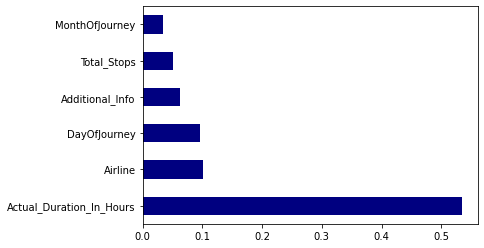

In [1250]:
#plot graph of feature importances for better visualization
featureImportance = pd.Series(feature_rf.feature_importances_, index=features.columns)
featureImportance.nlargest(6).plot(kind='barh',color="navy") # Lets plot for 8 features 
plt.show()

- Above is most Important six features
- The most important feature is Actual_Duration_In_Hours

# Model Building

In [1251]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1252]:
features=df.drop(['Price'], axis=1)
target=df[['Price']]

In [1253]:
# Define function to get the r2 Score for different Regression models
def get_r2_score(model,features,target):
    max_r2_score=0
    for i in range(40,100):
        x_train, x_test, y_train, y_test = train_test_split(features, target,random_state = i,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",i," is ",r2)
        if r2>max_r2_score:
            max_r2_score=r2
            final_i=i
    print("At ",final_i,"r2 score is ",max_r2_score)
    return final_i

# Linear Regression

In [1254]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
get_r2_score(lr,features,target)

r2 score corresponding to  40  is  0.5065519575085085
r2 score corresponding to  41  is  0.49784140678539834
r2 score corresponding to  42  is  0.48667828031979354
r2 score corresponding to  43  is  0.4823405477960222
r2 score corresponding to  44  is  0.49979404415693907
r2 score corresponding to  45  is  0.4916745451811606
r2 score corresponding to  46  is  0.4992249195504218
r2 score corresponding to  47  is  0.4864172321636675
r2 score corresponding to  48  is  0.4843489476617112
r2 score corresponding to  49  is  0.5319020483541822
r2 score corresponding to  50  is  0.49874750956467706
r2 score corresponding to  51  is  0.510938871474273
r2 score corresponding to  52  is  0.5040333711772813
r2 score corresponding to  53  is  0.48188231433680395
r2 score corresponding to  54  is  0.469405883245298
r2 score corresponding to  55  is  0.48759988646684194
r2 score corresponding to  56  is  0.49128123635583176
r2 score corresponding to  57  is  0.47272021114374296
r2 score corresponding

49

In [1255]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 49)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
r2_final_score=r2_score(y_test,pred_test)
r2_final_score

0.5319020483541822

In [1256]:
from sklearn import metrics
# calculate MAE, MSE, RMSE on Train Data
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

mean_absolute_error : 2251.7542307865415
mean_squared_error :  8314825.7794185905
root_mean_squared_error :  2883.5439617627803


In [1257]:
# calculate MAE, MSE, RMSE on Test Data
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, pred_test))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, pred_test))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

mean_absolute_error : 2229.7304658941684
mean_squared_error :  7861992.836806858
root_mean_squared_error :  2803.924541924561


In [1258]:
#So with above data,lets select CV as 5, as most of them as same CV
from sklearn.model_selection import cross_val_score
lsScore_selected=cross_val_score(lr,features,target,cv=5).mean()
print("The CV score is :",lsScore_selected)

The CV score is : 0.4963320253599738


In [1259]:
lr_data = {'Model': ['Linear Regression'], 
           'MAE': metrics.mean_absolute_error(y_test, pred_test),'MSE':metrics.mean_squared_error(y_test, pred_test),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, pred_test)),
           'R2 Score': r2_final_score,
           'CV Score': lsScore_selected
          }

df_LR = pd.DataFrame(lr_data)
df_LR

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Linear Regression,2229.730466,7.861993e+06,2803.924542,0.531902,0.496332


# Regularization Techniques
Once we use linear regression on a data-set divided in to training and test set, calculating the scores on training and test set can give us a rough idea about whether the model is suffering from over-fitting or under-fitting.

If we have very few features on a data-set and the score is poor for both training and test set then it’s a problem of under-fitting. On the other hand if we have large number of features and test score is relatively poor than the training score then it’s the problem of over-fitting.

Regularization is a simple technique to reduce model complexity and prevent over-fitting which may result from simple linear regression.

# Ridge

In [1260]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.1,max_iter=20, normalize=True)

In [1261]:
get_r2_score(ridgeReg,features,target)

r2 score corresponding to  40  is  0.50221005339696
r2 score corresponding to  41  is  0.49201465004258726
r2 score corresponding to  42  is  0.48358599259760393
r2 score corresponding to  43  is  0.4781203861655613
r2 score corresponding to  44  is  0.49592907787377916
r2 score corresponding to  45  is  0.48840864918876414
r2 score corresponding to  46  is  0.4946153509202458
r2 score corresponding to  47  is  0.479001693221197
r2 score corresponding to  48  is  0.484301325618959
r2 score corresponding to  49  is  0.5238148342061876
r2 score corresponding to  50  is  0.4941169935647932
r2 score corresponding to  51  is  0.5046418475779959
r2 score corresponding to  52  is  0.5011475329743985
r2 score corresponding to  53  is  0.47805689096327286
r2 score corresponding to  54  is  0.46768309130076313
r2 score corresponding to  55  is  0.4899575709546322
r2 score corresponding to  56  is  0.48477605729233164
r2 score corresponding to  57  is  0.47162073392953396
r2 score corresponding t

49

In [1262]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 49)
ridgeReg.fit(x_train,y_train)
ridge_pred = ridgeReg.predict(x_test)
ridge_pred_train = ridgeReg.predict(x_train)
r2_final_score=r2_score(y_test,ridge_pred)
r2_final_score

0.5238148342061876

In [1263]:
ridge_cvScore=cross_val_score(ridgeReg,features,target,cv=5).mean()
print("The CV score is :",ridge_cvScore)

The CV score is : 0.4929087167467923


In [1264]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, ridge_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, ridge_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print("Cross Validation Score : ",ridge_cvScore)

r2_score 0.5238148342061876
mean_absolute_error : 2252.619661161593
mean_squared_error :  7997822.569617492
root_mean_squared_error :  2828.0421796036726
Cross Validation Score :  0.4929087167467923


In [1265]:
# Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, ridge_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, ridge_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, ridge_pred_train)))
print ("Cross Validation Score : ", ridge_cvScore)

r2_score 0.5238148342061876
mean_absolute_error : 2264.859291894407
mean_squared_error :  8371281.398331632
root_mean_squared_error :  2893.3166778511527
Cross Validation Score :  0.4929087167467923


In [1266]:
ridge_data = {'Model': ['Ridge'], 
           'MAE': metrics.mean_absolute_error(y_test, ridge_pred),'MSE':metrics.mean_squared_error(y_test, ridge_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)),
           'R2 Score': r2_final_score,
           'CV Score': ridge_cvScore
             }  

df_Ridge = pd.DataFrame(ridge_data)  
df_Ridge

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Ridge,2252.619661,7.997823e+06,2828.04218,0.523815,0.492909


# KNeighborsRegressor

In [1267]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [993]:
get_r2_score(knn,features,target)

r2 score corresponding to  40  is  0.6567451550909742
r2 score corresponding to  41  is  0.6629857631863476
r2 score corresponding to  42  is  0.6679321075133149
r2 score corresponding to  43  is  0.6504369665665601
r2 score corresponding to  44  is  0.6642111726256386
r2 score corresponding to  45  is  0.6596965498774036
r2 score corresponding to  46  is  0.6883203097820572
r2 score corresponding to  47  is  0.6669573992029483
r2 score corresponding to  48  is  0.666663134669813
r2 score corresponding to  49  is  0.7093014219195883
r2 score corresponding to  50  is  0.6512939283420964
r2 score corresponding to  51  is  0.6942390430148835
r2 score corresponding to  52  is  0.6763230233178921
r2 score corresponding to  53  is  0.6721987974760151
r2 score corresponding to  54  is  0.6436287205757387
r2 score corresponding to  55  is  0.6696097935575123
r2 score corresponding to  56  is  0.6802071777336008
r2 score corresponding to  57  is  0.6705149520461614
r2 score corresponding to  58

49

In [1268]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 49)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_pred_train = knn.predict(x_train)
r2_final_score=r2_score(y_test,knn_pred)
r2_final_score

0.7093014219195883

In [1269]:
knn_cvScore=cross_val_score(knn,features,target,cv=5).mean()
print("The CV score is :",knn_cvScore)

The CV score is : 0.6780123158504131


In [1270]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, knn_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, knn_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))
print("Cross Validation Score : ",knn_cvScore)

r2_score 0.7093014219195883
mean_absolute_error : 1571.3778440139097
mean_squared_error :  4882461.310720318
root_mean_squared_error :  2209.629224716291
Cross Validation Score :  0.6780123158504131


In [1271]:
#Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, knn_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, knn_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, knn_pred_train)))
print("Cross Validation Score : ",knn_cvScore)

r2_score 0.7093014219195883
mean_absolute_error : 1263.6643318430204
mean_squared_error :  3405354.744023845
root_mean_squared_error :  1845.3603290479193
Cross Validation Score :  0.6780123158504131


In [1272]:
knn_data = {'Model': ['KNN'], 
           'MAE': metrics.mean_absolute_error(y_test, knn_pred),'MSE':metrics.mean_squared_error(y_test, knn_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, knn_pred)),
           'R2 Score': r2_final_score,
           'CV Score': knn_cvScore
           }  

df_knn = pd.DataFrame(knn_data)  
df_knn

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,KNN,1571.377844,4.882461e+06,2209.629225,0.709301,0.678012


# Decisoin Tree Regressor

In [1279]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor(criterion="mae",max_features="auto",splitter="best",min_samples_split= 10)

In [1280]:
get_r2_score(dr,features,target)

r2 score corresponding to  40  is  0.859662971951718
r2 score corresponding to  41  is  0.8609655097510134
r2 score corresponding to  42  is  0.8532864399319404
r2 score corresponding to  43  is  0.8688200598849851
r2 score corresponding to  44  is  0.8538629290370507
r2 score corresponding to  45  is  0.8621253792704197
r2 score corresponding to  46  is  0.878968852834054
r2 score corresponding to  47  is  0.8682174644177747
r2 score corresponding to  48  is  0.8643332452332044
r2 score corresponding to  49  is  0.8810234039955771
r2 score corresponding to  50  is  0.8571235702043513
r2 score corresponding to  51  is  0.8701860535639852
r2 score corresponding to  52  is  0.8682339144746052
r2 score corresponding to  53  is  0.851629892688558
r2 score corresponding to  54  is  0.8698705129944622
r2 score corresponding to  55  is  0.8527826810489624
r2 score corresponding to  56  is  0.8579013769312931
r2 score corresponding to  57  is  0.8755626725250203
r2 score corresponding to  58  

61

In [1281]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 61)
dr.fit(x_train,y_train)
dr_pred = dr.predict(x_test)
dr_pred_train = dr.predict(x_train)
r2_final_score=r2_score(y_test,dr_pred)
r2_final_score

0.884821627655135

In [1282]:
dtr_cvScore=cross_val_score(dr,features,target,cv=5).mean()
print("The CV score is :",dtr_cvScore)

The CV score is : 0.8574162602599378


In [1283]:
# Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, dr_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, dr_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, dr_pred_train)))
print ("Cross Validation Score : ", dtr_cvScore)

r2_score 0.884821627655135
mean_absolute_error : 383.40064580228517
mean_squared_error :  968950.3165052161
root_mean_squared_error :  984.3527398779444
Cross Validation Score :  0.8574162602599378


In [1284]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, dr_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, dr_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, dr_pred)))
print("Cross Validation Score : ",dtr_cvScore)

r2_score 0.884821627655135
mean_absolute_error : 711.3708395429707
mean_squared_error :  1929731.2030551415
root_mean_squared_error :  1389.1476534390222
Cross Validation Score :  0.8574162602599378


In [1285]:
decisionTree_data = {'Model': ['Decision Tree Regressor'], 
           'MAE': metrics.mean_absolute_error(y_test, dr_pred),'MSE':metrics.mean_squared_error(y_test, dr_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, dr_pred)),
           'R2 Score': r2_score(y_test,dr_pred),
           'CV Score': dtr_cvScore
            }  

df_DT = pd.DataFrame(decisionTree_data)  
df_DT

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Decision Tree Regressor,711.37084,1.929731e+06,1389.147653,0.884822,0.857416


# Random Forest Regressor

In [1286]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(criterion="mae",max_features="auto",n_estimators=10,min_samples_split=5,min_samples_leaf=2)

In [1022]:
get_r2_score(rfr,features,target)

r2 score corresponding to  40  is  0.9069189507576902
r2 score corresponding to  41  is  0.9116077095572501
r2 score corresponding to  42  is  0.9089669986278182
r2 score corresponding to  43  is  0.9054829334269665
r2 score corresponding to  44  is  0.909514066654129
r2 score corresponding to  45  is  0.9062194078859108
r2 score corresponding to  46  is  0.9044453115815483
r2 score corresponding to  47  is  0.904754711922734
r2 score corresponding to  48  is  0.9012544939084246
r2 score corresponding to  49  is  0.9202130195894648
r2 score corresponding to  50  is  0.8906136829826957
r2 score corresponding to  51  is  0.9063192028215474
r2 score corresponding to  52  is  0.8921627477321579
r2 score corresponding to  53  is  0.9096062832171418
r2 score corresponding to  54  is  0.9039036697774627
r2 score corresponding to  55  is  0.892189614492203
r2 score corresponding to  56  is  0.9056152178731459
r2 score corresponding to  57  is  0.9105305545668908
r2 score corresponding to  58  

49

In [1287]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 49)
rfr=RandomForestRegressor(criterion="mae",max_features="auto",n_estimators=10,min_samples_split=5,min_samples_leaf=2)
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
rfr_pred_train = rfr.predict(x_train)
r2_final_score=r2_score(y_test,rfr_pred)
r2_final_score

0.9150643877070145

In [1288]:
rfr_cvScore=cross_val_score(rfr,features,target,cv=5).mean()
print("The CV score is :",rfr_cvScore)

The CV score is : 0.9024285934670235


In [1289]:
# Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, rfr_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, rfr_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, rfr_pred_train)))
print ("Cross Validation Score : ", rfr_cvScore)

r2_score 0.9150643877070145
mean_absolute_error : 484.3440449577745
mean_squared_error :  788351.6487950198
root_mean_squared_error :  887.891687535715
Cross Validation Score :  0.9024285934670235


In [1290]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, rfr_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, rfr_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print("Cross Validation Score : ",rfr_cvScore)

r2_score 0.9150643877070145
mean_absolute_error : 686.1417287630404
mean_squared_error :  1426545.818219076
root_mean_squared_error :  1194.3809351371428
Cross Validation Score :  0.9024285934670235


In [1291]:
randomForest_data = {'Model': ['Random Forest'], 
           'MAE': metrics.mean_absolute_error(y_test, rfr_pred),'MSE':metrics.mean_squared_error(y_test, rfr_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)),
           'R2 Score': r2_score(y_test,rfr_pred),
           'CV Score': rfr_cvScore
            }  

df_RF = pd.DataFrame(randomForest_data)  
df_RF

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Random Forest,686.141729,1.426546e+06,1194.380935,0.915064,0.902429


In [1292]:
modelDF=pd.concat([df_LR,df_Ridge,df_knn,df_DT,df_RF]).reset_index()
modelDF.drop(columns=['index'],axis=1,inplace=True)
modelDF

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Linear Regression,2229.730466,7.861993e+06,2803.924542,0.531902,0.496332
1,Ridge,2252.619661,7.997823e+06,2828.042180,0.523815,0.492909
2,KNN,1571.377844,4.882461e+06,2209.629225,0.709301,0.678012
3,Decision Tree Regressor,711.370840,1.929731e+06,1389.147653,0.884822,0.857416
4,Random Forest,686.141729,1.426546e+06,1194.380935,0.915064,0.902429


Random Forest is performing best and it has the least difference between R2 Score and CV Score.So we will save this model for predicting the prices of flight

<AxesSubplot:ylabel='Density'>

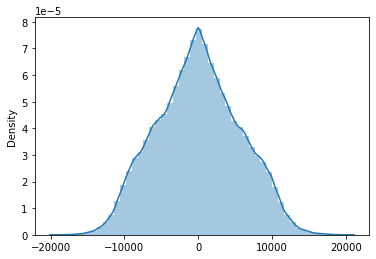

In [1293]:
predictions=rfr.predict(x_test)
sns.distplot(np.array(y_test)-predictions)

We dont see any skewness in the graph and it looks like a Normal distribution , It means our selected model is good

# Saving the model

In [1294]:
from joblib import dump , load
dump(rfr,'FlightPrice.joblib')
rfr_load=load('FlightPrice.joblib')

In [1295]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
filename = os.path.join(savedir, 'FlightPrice.joblib')

In [1296]:
import joblib
joblib.dump(rfr, filename) 
#['...FlightPrice.joblib']

['C:\\Users\\mum1user\\AppData\\Local\\Temp\\tmp74o6obni\\FlightPrice.joblib']

In [1297]:
joblib.load(filename)

RandomForestRegressor(criterion='mae', min_samples_leaf=2, min_samples_split=5,
                      n_estimators=10)

# Test Data Importing

In [1298]:
test=pd.read_excel(r"C:\Users\mum1user\Downloads\FlightDataset\Test_set.xlsx")
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [1299]:
test.shape

(2671, 10)

In [1300]:
testWithoutPrice=test
testWithoutPrice

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


We will try to use the same column as what we used in our Train data to predict the flight prices, so we are proceeding directly as we have detailed explanation above.

In [1301]:
test['Date_of_Journey']=pd.to_datetime(test['Date_of_Journey'])
test['DayOfJourney']=test['Date_of_Journey'].apply(lambda x:x.day)
test['MonthOfJourney']=test['Date_of_Journey'].apply(lambda x:x.month)

In [1302]:
test['Arrival_Time'],_= test['Arrival_Time'].str.split(' ',1).str

In [1303]:
test['Arr_Hr'],test['Arr_Min'] = test['Arrival_Time'].str.split(':',2).str

In [1304]:
test['Dep_Hr'],test['Dep_Min'] = test['Dep_Time'].str.split(':',2).str

In [1305]:
test['Duration'] = test['Duration'].str.replace('h ',':').str.replace('m','')
test['Duration_Hr'],test['Duration_Min'] = test['Duration'].str.split(':',2).str

In [1306]:
test = test.fillna(0)

In [1307]:
test['Total_Stops'],_ = test['Total_Stops'].str.split(' stops').str
test['Total_Stops'],_ = test['Total_Stops'].str.split(' stop').str
test['Total_Stops'] = test['Total_Stops'].apply(lambda x: 0 if 'non-stop' in x else x)

In [1308]:
test['Additional_Info'] = test['Additional_Info'].str.replace('No info','No Info')

In [1309]:
test.drop(["Date_of_Journey", "Dep_Time","Duration","Arrival_Time","Route"], axis = 1, inplace = True)

In [1310]:
test.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,DayOfJourney,MonthOfJourney,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
0,Jet Airways,Delhi,Cochin,1,No Info,6,6,04,25,17,30,10,55


In [1311]:
df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,DayOfJourney,MonthOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Actual_Duration_In_Hours,Price
0,3,0,2,0,6,24,4,22,20,1,10,2.833333,3897


In [1312]:
test["Dep_Hr"] = test["Dep_Hr"].astype(str).astype(int)
test["Arr_Hr"] = test["Arr_Hr"].astype(str).astype(int)
test['Duration_Hr'],_ = test['Duration_Hr'].str.split('h',1).str
test['Duration_Hr'] = test['Duration_Hr'].astype(int)
test['Duration_Min'] = test['Duration_Min'].astype(int)
test["Total_Stops"] = test["Total_Stops"].astype(str).astype(int)
test["Dep_Min"] = test["Dep_Min"].astype(str).astype(int)
test["Arr_Min"] = test["Arr_Min"].astype(str).astype(int)

In [1313]:
test['Airline']=le.fit_transform(test['Airline'])
test['Source']=le.fit_transform(test['Source'])
test['Destination']=le.fit_transform(test['Destination'])
test['Additional_Info']=le.fit_transform(test['Additional_Info'])
test['MonthOfJourney']=le.fit_transform(test['MonthOfJourney'])

In [1314]:
test['Actual_Duration_In_Hours'] = test['Duration_Hr']+(test['Duration_Min']/60)

In [1315]:
test.drop(["Duration_Hr", "Duration_Min"], axis = 1, inplace = True)

In [1316]:
test = test[['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
        'DayOfJourney', 'MonthOfJourney', 'Dep_Hr', 'Dep_Min',
        'Arr_Hr', 'Arr_Min', 'Actual_Duration_In_Hours']]
test.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,DayOfJourney,MonthOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Actual_Duration_In_Hours
0,4,2,1,1,4,6,4,17,30,4,25,10.916667
1,3,3,0,1,4,5,6,6,20,10,20,4.000000


In [1317]:
df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,DayOfJourney,MonthOfJourney,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Actual_Duration_In_Hours,Price
0,3,0,2,0,6,24,4,22,20,1,10,2.833333,3897


So we see that data which has been provided to us are in order of train data.

In [1318]:
predict=rfr.predict(test)

In [1319]:
predict.shape

(2671,)

In [1320]:
predict

array([10398.5 ,  4226.  , 10262.  , ..., 13336.45, 14250.2 ,  6103.  ])

In [1321]:
df_Submission=pd.DataFrame(predict)

In [1322]:
df_Submission.rename(columns={0: "Price"}, errors="raise",inplace=True)

In [1323]:
df_Submission

,Price
0,10398.50
1,4226.00
2,10262.00
3,10189.90
4,3967.90
...,...
2666,10203.00
2667,4946.15
2668,13336.45
2669,14250.20


In [1324]:
df_Submission.to_csv(r'C:\Users\mum1user\DataTrained\Projects\Submission.csv')

In [1325]:
sample_data = pd.read_csv(r'C:\Users\mum1user\DataTrained\Projects\Submission.csv')
sample_data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
sample_data.head()

,Price
0,10398.5
1,4226.0
2,10262.0
3,10189.9
4,3967.9


In [1326]:
model_testDF = pd.concat([testWithoutPrice,df_Submission], axis=1, join='inner')
model_testDF

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,DayOfJourney,MonthOfJourney,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min,Price
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10:55,1 stop,No info,6,6,04,25,17,30,10,55,10398.50
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,10,20,06,20,4h,NaN,4226.00
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00,23:45,1 stop,In-flight meal not included,21,5,19,00,19,15,23,45,10262.00
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,21,00,08,00,13h,NaN,10189.90
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45,2:50,non-stop,No info,24,6,02,45,23,55,2,50,3967.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25,23:55,1 stop,No info,6,6,20,25,20,30,23,55,10203.00
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2:35,non-stop,No info,27,3,16,55,14,20,2,35,4946.15
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,21:50,04:25,6:35,1 stop,No info,3,6,04,25,21,50,6,35,13336.45
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15:15,1 stop,No info,3,6,19,15,04,00,15,15,14250.20


We have successfully predicted the price of flight which is shown above